In [84]:
class Interpolate:
#    'Common base class for all employees'
#    empCount = 0

    def __init__(self,inter_method):
        self.method = inter_method
        self.w = 0
        self.v = 0
        self.xi = 0
        self.lambda = 0


    def parameterization(self,xi, yi):
        n = xi.shape[0]
        m = xi.shape[1]
        if self.method =='NPS':
            
            A= np.zeros(shape=(m,m))

            for ii in range(0,m,1): # for ii =0 to m-1 with step 1; range(1,N,1)
                for jj in range(0,m,1):
                    A[ii,jj] = (np.dot(xi[:,ii] - xi[:,jj],xi[:,ii] - xi[:,jj]))**(3.0/2.0)

            V = np.concatenate((np.ones((1,m)), xi), axis=0)
            A1 = np.concatenate((A, np.transpose(V)),axis=1)
            A2 = np.concatenate((V, np.zeros(shape=(n+1,n+1) )), axis=1)
            yi = yi[np.newaxis,:]

            print(yi.shape)
            b = np.concatenate([np.transpose(yi), np.zeros(shape=(n+1,1))])
    #      b = np.concatenate((np.transpose(yi), np.zeros(shape=(n+1,1) )), axis=0)
            A = np.concatenate((A1,A2), axis=0)
            wv = np.linalg.solve(A,b)
            self.w = wv[:m]
            self.v = wv[m:]
            self.xi = xi
    #      print(V)

        if self.method == "MAPS" or self.method == "MAPS2":
            a = np.ones(xi.shape[0],1)
            #a = ones(size(xi,1),1);
            lambda = 1;
            for i in range (0,20):
            # %TODO: FIX THE ITER MAX  
            #     %    [inter_par, a]  = Scale_interpar( xi,yi,a0, lambda); % method1
            # [inter_par,a]  = Scale_interpar( xi,yi,a, lambda); %method2
            # inter_par{1}=inter_method;
            # lambda = lambda/2;
            # end
            # if inter_method==8
            # %      keyboard
            # epsFun = yi-y0;
            # inter_par{8}=epsFun;
            # end

# Scaled Polyharmonic Spline
def Scale_interpar(xi,yi,a0, lambda0):
    #This function is for spinterpolation and finds the scaling factor for
    #polyharmonic spline interpolation
    self.lambda = lambda0;
    n = xi.shape[0] 
    a0 = ones(n,1)
    self.lambda =1;
    
    return inter_par,a 


# % options = optimoptions(@fmincon,'Algorithm','sqp','Display','iter-detailed' );
# options = optimoptions(@fmincon,'Algorithm','sqp');
# options = optimoptions(options,'GradObj','on');
# lb = zeros(n,1); ub = ones(n,1)*n;   % No upper or lower bounds
# % for ii=1:20
# fung = @(a)DiagonalScaleCost(a,xi,yi);
# % keyboard
# [a,fval] = fmincon(fung,a0,[],[],ones(1,n),n,lb,ub,[],options);
# % end
# [ff,gf,inter_par] = DiagonalScaleCost(a,xi,yi);

# end
# %
# function [ Cost, gradCost, inter_par ] = DiagonalScaleCost( a, xi, yi)
# %The Loss (cost) function that  how smooth the interpolating funciton is.
# global lambda
# % keyboard
# inter_par= interpolateparametarization_scaled(xi,yi,a,1, lambda);
# w = inter_par{2};
# Cost =sum(w.^2);
# % keyboard
# if nargout>1
# %The gradient of Loss (cost) function that indicates how smooth the interpolating funciton is.
# Dw = inter_par{5};
# gradCost =2*Dw*w;
# end
# inter_par{7}=a;
# inter_par{1}=7;
# %%%%%%%%%%%%%
# end
# %







    def pred(self,x):
         if self.method == "NPS":
            w = self.w
            v = self.v
            xi = self.xi

            S = xi - x
#             print np.dot(v.T,np.concatenate([np.ones((1,1)),x],axis=0)) + np.dot(w.T,np.sqrt(np.diag(np.dot(S.T,S))))**3
            return np.dot(v.T,np.concatenate([np.ones((1,1)),x],axis=0)) + np.dot(w.T,(np.sqrt(np.diag(np.dot(S.T,S)))**3))
            
            #y = v.T*np.concatenate([1, x]) + w.T*sqrt(diag(S' * S)) .^ 3

        
        
        
        
        

def fun(x,  alpha=0.01):
    y = np.array((x[0,:]-0.45)**2.0 + alpha*(x[1,:]-0.45)**2.0)
    return y.T
#    return (x[0,:]-0.45)**2.0 + alpha*(x[1,:]-0.45)**2.0

xi = np.array([[0.5000 , 0.8000   , 0.5000,    0.2000,    0.5000],  [0.5000,    0.5000,    0.8000,    0.5000,    0.2000]])
#xi=np.random.rand(2,3)
x=np.array([[0.5],[0.5]])
#yi=np.random.rand(1,3)
yi=fun(xi)
print yi
#yi = np.array(yi)
print(yi.shape)
print(xi.shape)
inter_par = Interpolate("NPS")
inter_par.parameterization(xi,yi)
inter_par.pred(x)
inter_par.w

[ 0.002525  0.122525  0.003725  0.062525  0.003125]
(5,)
(2, 5)
(1, 5)


array([[-1.19029641],
       [ 1.00175565],
       [-0.40660744],
       [ 1.00175565],
       [-0.40660744]])

In [85]:
print  yi
print x
print fun(x)

# yy = fun(x)-inter_par.pred(x)

print inter_par.pred(x) 



[ 0.002525  0.122525  0.003725  0.062525  0.003125]
[[ 0.5]
 [ 0.5]]
[ 0.002525]
[[ 0.002525]]


In [3]:
# get support vectors
clf.support_vectors_


# get indices of support vectors
clf.support_ 

# get number of support vectors for each class
clf.n_support_ 

array([1, 1], dtype=int32)

Automatically created module for IPython interactive environment


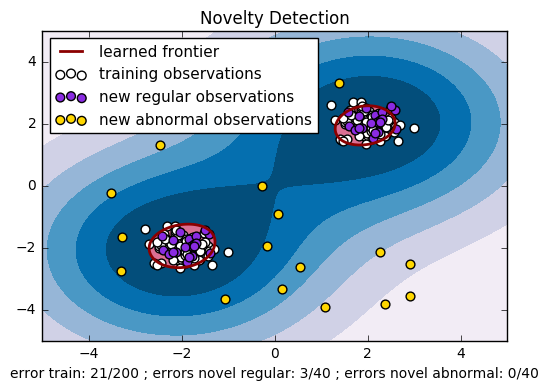

In [5]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s)
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s)
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()